In [1]:
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(60000, 784)
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
#import numpy as np
#np.savetxt('aa.csv',x_train,fmt='%5d')


In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_test = x_test.reshape(10000, 784)
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:

batch_size = 128
num_classes = 10
epochs = 5

In [9]:



y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


What is Dropout? <br>
Dropout is used to handle the problem of overfitting.
It Prevent Neural Networks from Overfitting.<br>
The model is trained in such a way that it does not learn interdependent set of features weights.
It randomly select neurons and those neurons are ignored during training. They are “dropped-out” randomly. 

Dropout is a Regulaizatin technique.<br>
Regularization is a technique which makes slight modifications to the learning algorithm such that the model
generalizes better. This in turn improves the model's performance on the unseen data as well.

In [10]:


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The number of parameters is 401920  because with every hidden unit you have 784 input weights and one weight of 
connection with bias. This means that every hidden unit gives you 785 parameters. You have 512 units so it sums up to 401920.

784+1*512 = 401920 <br>
513*512 = 262656 <br>
512+1*10 = 5130

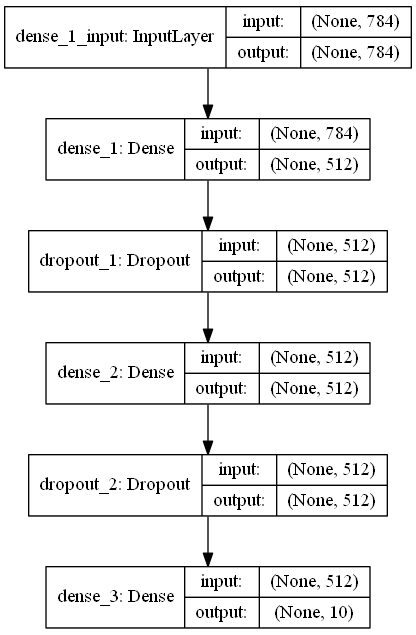

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [13]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 85us/step - loss: 11.9325 - acc: 0.2589 - val_loss: 10.4054 - val_acc: 0.3539
Epoch 2/30
60000/60000 [==============================] - 4s 72us/step - loss: 9.9704 - acc: 0.3808 - val_loss: 8.6433 - val_acc: 0.4631
Epoch 3/30
60000/60000 [==============================] - 5s 76us/step - loss: 8.7148 - acc: 0.4587 - val_loss: 8.4622 - val_acc: 0.4748
Epoch 4/30
60000/60000 [==============================] - 5s 76us/step - loss: 8.6257 - acc: 0.4647 - val_loss: 9.1476 - val_acc: 0.4320
Epoch 5/30
60000/60000 [==============================] - 5s 86us/step - loss: 8.6356 - acc: 0.4639 - val_loss: 8.3706 - val_acc: 0.4804
Epoch 6/30
60000/60000 [==============================] - 5s 86us/step - loss: 8.4930 - acc: 0.4729 - val_loss: 8.8146 - val_acc: 0.4529
Epoch 7/30
60000/60000 [========

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.88544591217041
Test accuracy: 0.5727
